In [1]:
#Tweet Data

In [1]:
import pandas as pd
df_tweets = pd.read_csv("C:/Users/inyoungjun/Dropbox (Personal)/[research]year2/[research]TweetCOVID/data/echen_dataset.csv")
df_tweets.head()
len(df_tweets)

427151

In [2]:
#Data Pre-processing

In [3]:
import nltk
nltk.download()

from nltk.corpus import stopwords


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [4]:
from nltk.corpus import stopwords
en_stop_words = set(stopwords.words('english'))
list(en_stop_words)[:10]

['you',
 'what',
 "she's",
 'isn',
 'who',
 'here',
 "hasn't",
 'when',
 "you'll",
 "shouldn't"]

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from datetime import datetime
import nltk
nltk.download('stopwords')
import pandas as pd
import re
import math

def clean_tweets(df=df_tweets, 
                 tweet_col='clean_text', 
                 date_col='created_at',
                 start_datetime=datetime(2020,1,20, 0, 0)
                ):
    
    df_copy = df.copy()
    
    # drop rows with empty values
    df_copy.dropna(inplace=True)
    
    # format the date
    df_copy[date_col] = df_copy[date_col].apply(lambda row: datetime.strptime(row, '%a %b %d %H:%M:%S +0000 %Y'))
    
    
    # filter rows older than a given date
    df_copy = df_copy[df_copy[date_col] >=start_datetime]
    
    # lower the tweets
    df_copy['preprocessed_' + tweet_col] = df_copy[tweet_col].str.lower()
    
    # filter out stop words and URLs
    en_stop_words = set(stopwords.words('english'))
    extended_stop_words = en_stop_words | \
                        {
                            '&amp;', 'rt',                           
                            'th','co', 're', 've', 'kim', 'daca'
                        }
    url_re = '(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})'        
    df_copy['preprocessed_' + tweet_col] = df_copy['preprocessed_' + tweet_col].apply(lambda row: ' '.join([word for word in row.split() if (not word in extended_stop_words) and (not re.match(url_re, word))]))
    
    # tokenize the tweets
    tokenizer = RegexpTokenizer('[a-zA-Z]\w+\'?\w*')
    df_copy['tokenized_' + tweet_col] = df_copy['preprocessed_' + tweet_col].apply(lambda row: tokenizer.tokenize(row))
    
    return df_copy
  
df_tweets = pd.read_csv("C:/Users/inyoungjun/Dropbox (Personal)/[research]year2/[research]TweetCOVID/data/echen_dataset.csv")
df_tweets_clean = clean_tweets(df_tweets)
df_tweets_clean.head()
#len(df_tweets_clean) #17241

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\inyoungjun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,text,clean_text,place,coordinates,user_location,created_at,username,user_id,us_state,retweet,preprocessed_clean_text,tokenized_clean_text
45,1267676535286267904_id,Sad truth https://t.co/ZkB3ya3N7m,Sad truth https://t.co/ZkB3ya3N7m,"{'id': '9f3d755fe1a081a4', 'url': 'https://api...","{'type': 'Point', 'coordinates': [-88.02441978...","Lombard, IL",2020-06-02 04:36:52,Jacob Dawson,61015432,il,0,sad truth,"[sad, truth]"
57,1267676885065949185_id,HOME WORKOUT - TUE - 6/2 Warmup &amp; Stretch...,HOME WORKOUT - TUE - 6/2 Warmup & Stretch. #a...,"{'id': '3b77caf94bfc81fe', 'url': 'https://api...","{'type': 'Point', 'coordinates': [-118.4049341...","Valley Village, CA",2020-06-02 04:38:16,Angelino CrossFit,2200765736,ca,0,home workout - tue - 6/2 warmup & stretch. #an...,"[home, workout, tue, warmup, stretch, angelino..."
62,1267677291510972416_id,Kudos to Sean Penn for using the power of his ...,Kudos to Sean Penn for using the power of his ...,"{'id': '011add077f4d2da3', 'url': 'https://api...","{'type': 'Point', 'coordinates': [-73.95, 40.65]}",Anywhere & Everywhere!,2020-06-02 04:39:53,ROHN PADMORE magazine,104517464,ny,0,kudos sean penn using power celebrity aid figh...,"[kudos, sean, penn, using, power, celebrity, a..."
65,1267677392212037632_id,Benton Farm Goooat Yoga this Friday night! Onl...,Benton Farm Goooat Yoga this Friday night! Onl...,"{'id': '6ffcf3b0b904bbcb', 'url': 'https://api...","{'type': 'Point', 'coordinates': [-84.60771918...","Walton, KY Northern Kentucky",2020-06-02 04:40:17,Benton Farm Non-profit org. Teach/Save Farms!,284329579,ky,0,benton farm goooat yoga friday night! 1/2 norm...,"[benton, farm, goooat, yoga, friday, night, no..."
66,1267677419856674816_id,Thank goddess for our backyard so I can stay h...,Thank goddess for our backyard so I can stay h...,"{'id': 'f77b0bf942a40070', 'url': 'https://api...","{'type': 'Point', 'coordinates': [-97.1292, 33...",Denton TX,2020-06-02 04:40:23,Beauty Pirate,921211387,tx,0,thank goddess backyard stay home still get sun...,"[thank, goddess, backyard, stay, home, still, ..."


In [10]:
#bag of words

In [6]:
def get_most_freq_words(str, n=None):
    vect = CountVectorizer().fit(str)
    bag_of_words = vect.transform(str)
    sum_words = bag_of_words.sum(axis=0) 
    freq = [(word, sum_words[0, idx]) for word, idx in vect.vocabulary_.items()]
    freq =sorted(freq, key = lambda x: x[1], reverse=True)
    return freq[:n]
  
get_most_freq_words([ word for tweet in df_tweets_clean.tokenized_clean_text for word in tweet],10)

[('covid', 3610),
 ('coronavirus', 2870),
 ('pandemic', 2249),
 ('covid19', 2234),
 ('social', 1842),
 ('home', 1722),
 ('distancing', 1707),
 ('new', 1525),
 ('stay', 1465),
 ('socialdistancing', 1419)]

In [ ]:
#Finding the number of topics
#Latent Dirichlet Allocation (LDA) is a probablistic transformation from
#bag-of-words counts into a topic space of lower dimensionality.

In [7]:
%%time

import matplotlib.pyplot as plt
# build a dictionary where for each tweet, each word has its own id.
# We have 6882 tweets and 10893 words in the dictionary.
tweets_dictionary = Dictionary(df_tweets_clean.tokenized_clean_text)


# build the corpus i.e. vectors with the number of occurence of each word per tweet
tweets_corpus = [tweets_dictionary.doc2bow(tweet) for tweet in df_tweets_clean.tokenized_clean_text]


Wall time: 1.12 s


In [8]:
%%time

# compute coherence
tweets_coherence = []
for nb_topics in range(1,36):
    lda = LdaModel(tweets_corpus, num_topics = nb_topics, id2word = tweets_dictionary, passes=10)
    cohm = CoherenceModel(model=lda, corpus=tweets_corpus, dictionary=tweets_dictionary, coherence='u_mass')
    coh = cohm.get_coherence()
    tweets_coherence.append(coh)

Wall time: 30min 28s


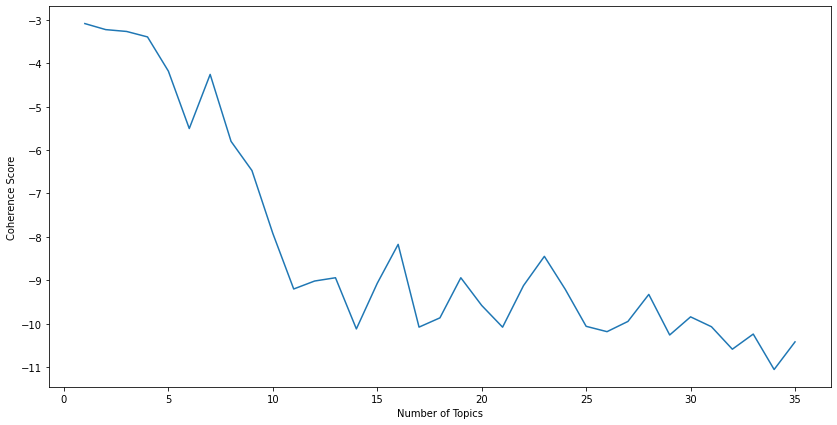

In [9]:
# visualize coherence
plt.figure(figsize=(14,7))
plt.plot(range(1,36),tweets_coherence)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score");

Wall time: 48.4 s


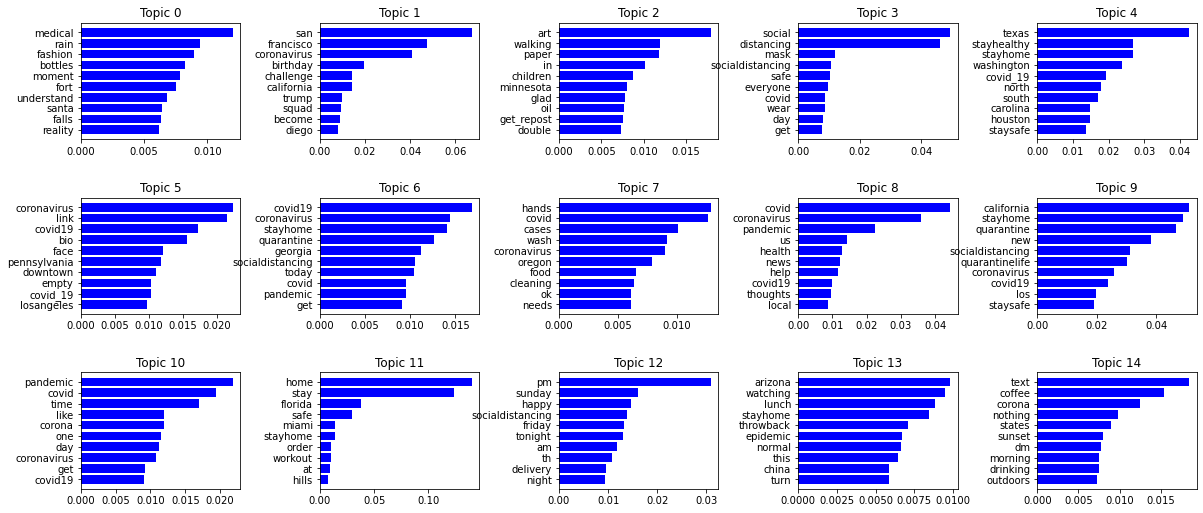

In [12]:
%%time
#Running LDA
from matplotlib import gridspec

k = 15
tweets_lda = LdaModel(tweets_corpus, num_topics = k, id2word = tweets_dictionary, passes=10)

def plot_top_words(lda=tweets_lda, nb_topics=k, nb_words=10):
    top_words = [[word for word,_ in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]
    top_betas = [[beta for _,beta in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]

    gs  = gridspec.GridSpec(round(math.sqrt(k))+1,round(math.sqrt(k))+1)
    gs.update(wspace=0.5, hspace=0.5)
    plt.figure(figsize=(20,15))
    for i in range(nb_topics):
        ax = plt.subplot(gs[i])
        plt.barh(range(nb_words), top_betas[i][:nb_words], align='center',color='blue', ecolor='black')
        ax.invert_yaxis()
        ax.set_yticks(range(nb_words))
        ax.set_yticklabels(top_words[i][:nb_words])
        plt.title("Topic "+str(i))
        
 
plot_top_words()